In [1]:
# Useful starting lines 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys
import time
import copy
from copy import deepcopy
import pickle
import math
import functools 
from IPython.display import display, HTML
import operator
from operator import itemgetter

import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(style="darkgrid")
sns.set_context("paper")

In [3]:
root_path = '/root/autodl-tmp/ttab'
sys.path.append(root_path)

In [4]:
from monitor.tools.show_results import extract_list_of_records, reorder_records, get_pickle_info, summarize_info
from monitor.tools.plot import plot_curve_wrt_time
import monitor.tools.plot_utils as plot_utils

from monitor.tools.utils import dict_parser
from monitor.tools.file_io import load_pickle

In [5]:
root_data_path = os.path.join(root_path,  'logs', 'resnet26')
experiments = ['cifar10c_episodic_oracle_model_selection']
raw_records = get_pickle_info(root_data_path, experiments)

we have 0/0 records.


""


/root/autodl-tmp/ttab/monitor/tools/plot_utils.py:112: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(


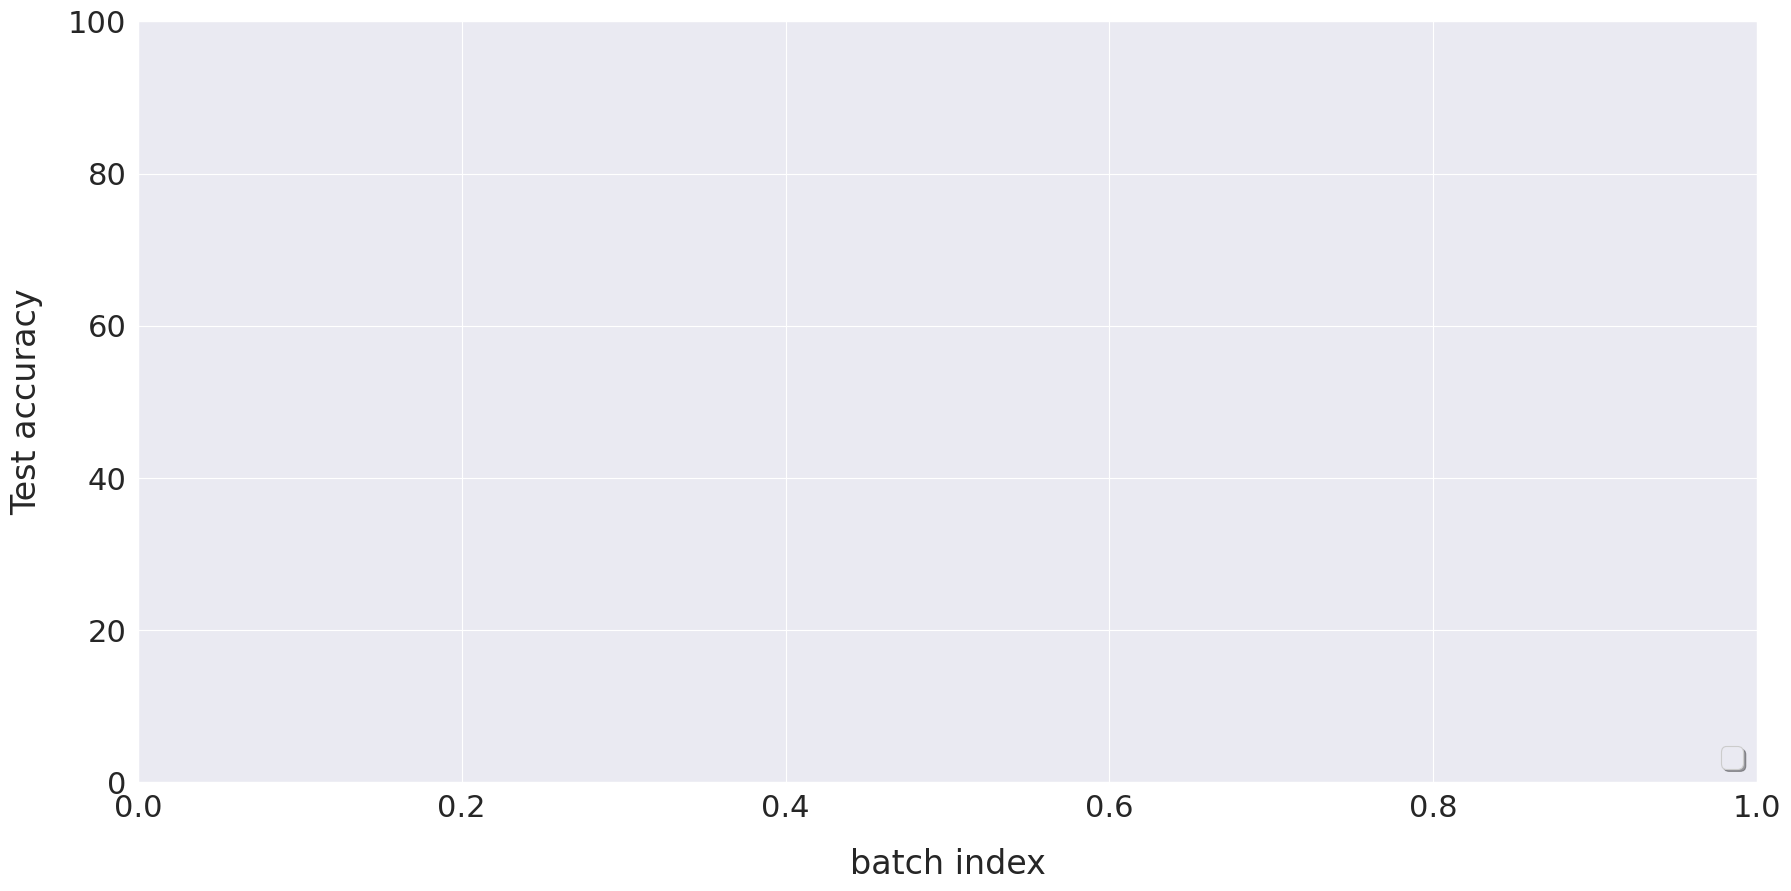

In [6]:
# Have a glimpse of experimental results.
conditions = {
    "model_adaptation_method": ["tent"],
    "seed": [2022],
    "batch_size": [64],
    "episodic": [False],
    "n_train_steps": [1],
    # "lr": [0.005],
    # "data_names": ["cifar10_c_deterministic-gaussian_noise-5"],
}
attributes = ['model_adaptation_method', 'step_ratio', 'label_shift_param', 'ckpt_path', 'episodic', 'model_selection_method', 'seed', 'data_names', 'status']
records = extract_list_of_records(list_of_records=raw_records, conditions=conditions)
aggregated_results, averaged_records_overall = summarize_info(records, attributes, reorder_on='model_adaptation_method', groupby_on='test-overall-accuracy', larger_is_better=True)
display(HTML(averaged_records_overall.to_html()))

# display test accuracy per test step.
aggregated_results, averaged_records_step_nonepisodic_optimal = summarize_info(records, attributes, reorder_on='model_adaptation_method', groupby_on='test-step-accuracy', larger_is_better=True)

fig = plt.figure(num=1, figsize=(18, 9))
ax1 = fig.add_subplot(111)
plot_curve_wrt_time(
    ax1, records,
    x_wrt_sth='test-step-step', y_wrt_sth='test-step-accuracy', is_smooth=True,
    xlabel='batch index', ylabel='Test accuracy', l_subset=0.0, r_subset=1, markevery_list=None,
    n_by_line=4, has_legend=True, legend='model_selection_method,step_ratio', legend_loc='lower right', legend_ncol=1, bbox_to_anchor=[1, 0],
    ylimit_bottom=0, ylimit_top=100, use_log=False)
fig.tight_layout()
plt.show()